<a href="https://colab.research.google.com/github/Piyaphum/Naive-Bayes-Classifier-Email/blob/main/Naive_Bayes_Classifier_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #import library ที่จำเป็น

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv') #อ่านข้อมูล
df.head() #เรียกดูข้อมูล 5 แถวแรก

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe() #ดูข้อมูลแต่ละหมวดหมู่ตาม Category (เช่น spam/ham)

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

**Convert the text data to numerical data**

In [ ]:
df['spam'] = df['Category'].apply(lambda x : 1 if x == 'spam' else 0) #เพิ่มคอลัมน์ spam เพื่อให้โมเดลอ่านง่ายขึ้น โดยที่ถ้า spam จะเป็น 1 ถ้าไม่ใช่ก็ 0
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Data Preprocessing**

In [ ]:
#แบ่งข้อมูลก่อนเทรนโมเดล
from sklearn.model_selection import train_test_split
#x_train/x_test -> ข้อความอีเมล และ y_train/y_test -> label (ham = 0 หรือ spam = 1)
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.25)
# แบ่งข้อมูลออกเป็น 25% เพื่อใช้ในการทดสอบ

**แปลง email จาก text -> numerical data**



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #ใช้ CountVectorizer() เพื่อแปลงข้อความเป็น Bag of Words (BoW)
v = CountVectorizer() #เพื่อแปลงข้อความเป็น Bag of Words (BoW)
x_train_count = v.fit_transform(x_train.values) #แปลงข้อความเป็น เมทริกซ์นับจำนวนคำ
x_train_count.toarray()[:3] #ดู 3 ตัวอย่างแรกของข้อมูลที่แปลงแล้ว

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB # import ตัว Naive Bayes นั่นคือ MultinomialNB
model = MultinomialNB()
model.fit(x_train_count, y_train) # จับข้อมูลโยนเข้าไป train

MultinomialNB()

**Test the Email ด้วยข้อมูลตัวอย่าง**

In [ ]:
# ลองเอาข้อความจากใน dataset สัก 1 ตัวมาทดสอบ
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    "Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!"
]
emails_count = v.transform(emails) #แปลงข้อความเป็นแบบเวกเตอร์แบบที่ใช้กับโมเดล
model.predict(emails_count) #ทำนายว่าเป็น 0 หรือ 1 (ham or spam)

array([0, 1])

**วัดค่าความถูกต้อง (Accuracy)**

In [ ]:
x_test_count = v.transform(x_test) #แปลง x_test เป็นเวกเตอร์เพื่อให้โมเดลทำการทำนาย
model.score(x_test_count, y_test) #คำนวณ accuracy ของ model

0.9899497487437185

**Import the Pipeline**

In [ ]:
#เพื่อจะได้ไม่ต้องนำข้อมูลมานำเข้าเองซ้ำ ๆ เช่น แปลงข้อความ -> เทรนโมเดล -> ทดสอบ จึงใช้ pipeline เข้ามาช่วย
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorzier', CountVectorizer() ), # convert ตัว text ไปเป็น vector
    ('nb', MultinomialNB()) #โมเดลตัว Naive Bayes
])

In [ ]:
clf.fit(x_train, y_train)
#เทรนโมเดลโดยใช้ pipeline
#ข้อดีคือ ไม่ต้องแปลงข้อความเองทุกครั้ง ใช้ pipeline ทำให้เอา

Pipeline(steps=[('vectorzier', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(x_test, y_test) #เรียกดู accuracy ของ clf (classifier)

0.9899497487437185

In [ ]:
clf.predict(emails) #ดูว่าตรงกับก่อนหน้านี้ที่ทำแบบ manual ไหม

array([0, 1])

**Visualization**

<ipython-input-21-2f30809e4c09>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], palette=['blue', 'red'])


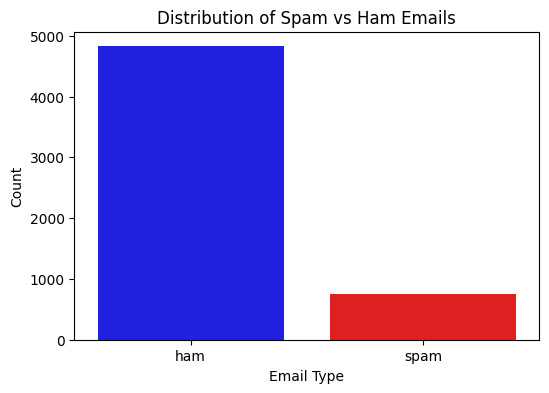

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Spam vs Ham Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Category'], palette=['blue', 'red'])
plt.title("Distribution of Spam vs Ham Emails")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()